In [10]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self):
        self.x = [i for i in range(10)]
        self.y = [2 * i for i in range(10)]
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


my_dataset = MyDataset()
my_dataloader = DataLoader(my_dataset, batch_size=2, shuffle=True)
for x_i, y_i in my_dataloader:
    print("x_i = ", x_i, " y_i = ", y_i)

x_i =  tensor([9, 6])  y_i =  tensor([18, 12])
x_i =  tensor([4, 2])  y_i =  tensor([8, 4])
x_i =  tensor([7, 1])  y_i =  tensor([14,  2])
x_i =  tensor([3, 5])  y_i =  tensor([ 6, 10])
x_i =  tensor([8, 0])  y_i =  tensor([16,  0])


In [19]:
!pip install pandas openpyxl opencv-python

In [33]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self):
        file_name = "dt.xlsx"
        data = pd.read_excel(file_name)
        self.x1 = data['x1']
        self.x2 = data['x2']
        self.x3 = data['x3']
        self.x4 = data['x4']
        self.y = data['y']
    def __len__(self):
        return len(self.x1)
    def __getitem__(self, idx):
        return self.x1[idx], self.x2[idx], self.x3[idx],self.x4[idx],self.y[idx]

mydataset = MyDataset()
mydataloader = DataLoader(mydataset, batch_size=2, shuffle=True)

for x1, x2, x3, x4, y in mydataloader:
    print("x1=",x1," x2=",x2," x3=",x3," x4=",x4," y=",y,)

x1= tensor([ 9, 17])  x2= tensor([0.0900, 0.1700], dtype=torch.float64)  x3= tensor([103, 111])  x4= tensor([18, 34])  y= tensor([1, 1])
x1= tensor([10,  8])  x2= tensor([0.1000, 0.0800], dtype=torch.float64)  x3= tensor([104, 102])  x4= tensor([20, 16])  y= tensor([0, 0])
x1= tensor([ 7, 13])  x2= tensor([0.0700, 0.1300], dtype=torch.float64)  x3= tensor([101, 107])  x4= tensor([14, 26])  y= tensor([1, 1])
x1= tensor([ 1, 15])  x2= tensor([0.0100, 0.1500], dtype=torch.float64)  x3= tensor([ 95, 109])  x4= tensor([ 2, 30])  y= tensor([1, 1])
x1= tensor([12,  2])  x2= tensor([0.1200, 0.0200], dtype=torch.float64)  x3= tensor([106,  96])  x4= tensor([24,  4])  y= tensor([0, 0])
x1= tensor([20, 19])  x2= tensor([0.2000, 0.1900], dtype=torch.float64)  x3= tensor([114, 113])  x4= tensor([40, 38])  y= tensor([0, 1])
x1= tensor([18, 14])  x2= tensor([0.1800, 0.1400], dtype=torch.float64)  x3= tensor([112, 108])  x4= tensor([36, 28])  y= tensor([0, 0])
x1= tensor([11,  6])  x2= tensor([0.1100,

In [5]:
import os
import cv2 as cv

# image_root = r"animals"

# for root, dirs,files in os.walk(image_root):
#     # print(root)
#     # # print(dirs)
#     # print(files)
#     for i in files:
#         file_i_full_path = os.path.join(root, i)
#         print(file_i_full_path)
#         img_i = cv.imread(file_i_full_path)
#         cv.imshow('img_i', img_i)
#         cv.waitKey(500)

In [20]:
import os
import cv2 as cv
import torch
import numpy as np

from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self):
        image_root = r"animals"
        self.file_path_list = []
        dir_name = []
        self.labels = []
        for root, dirs,files in os.walk(image_root):
            if dirs:
                dir_name = dirs
            for i in files:
                file_i_full_path = os.path.join(root, i)
                self.file_path_list.append(file_i_full_path)
                label = root.split(os.sep)[-1]
                label_id = dir_name.index(label)
                self.labels.append(label_id)
    def __len__(self):
        return len(self.file_path_list)
    def __getitem__(self, idx):
        img = cv.imread(self.file_path_list[idx])
        img = cv.resize(img, dsize=(256, 256))
        # HWC 0 1 2
        # CHW 2 0 1
        img = np.transpose(img, (2,1,0))
        img_tensor = torch.from_numpy(img)
        return img_tensor, self.labels[idx]

my_img_dt = MyDataset()
my_dt_loader = DataLoader(my_img_dt, batch_size=4, shuffle=True)

# for x_i, y_i in my_dt_loader:
#     print(x_i.shape, y_i)

In [21]:
## 导入Pytorch官网的数据集
import torch
import torchvision

transform = torchvision.transforms.ToTensor()

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)

# for x,y in trainloader:
#     print(x.shape, y)

# for x,y in testloader:
#     print(x.shape, y)

In [10]:
# 数据增强与转换
# 1. 固定转换
# 2. 随机转换
# 3. 概率控制的转换

In [12]:
!pip install matplotlib

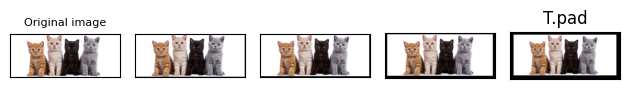

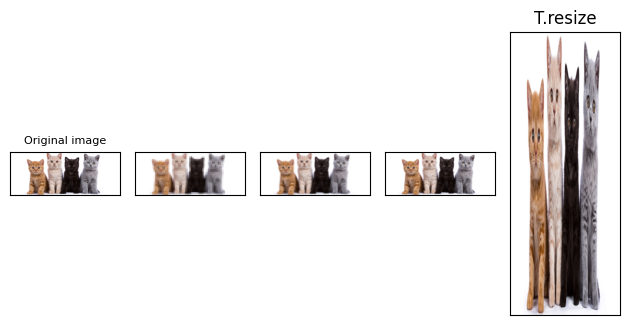

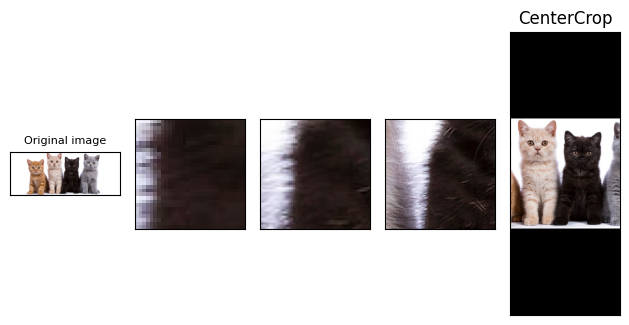

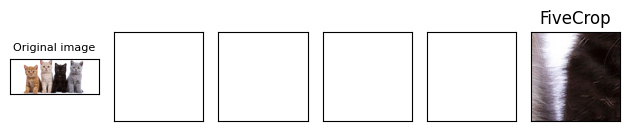

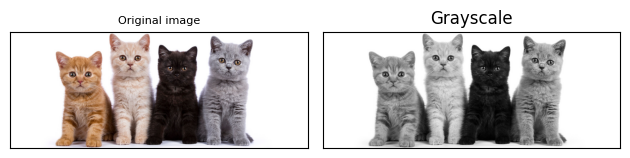

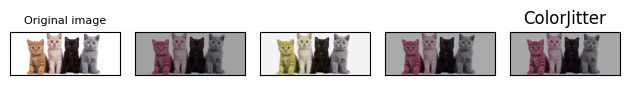

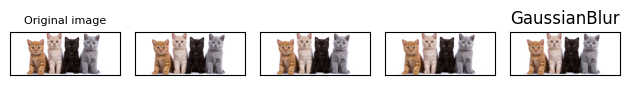

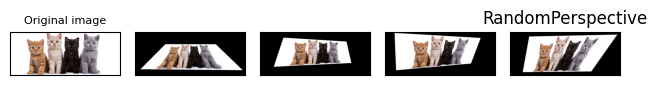

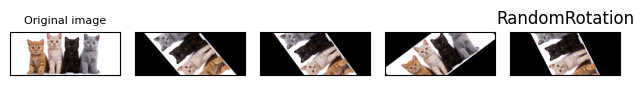

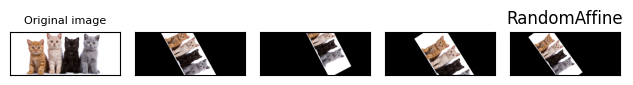

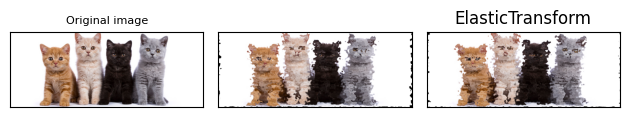

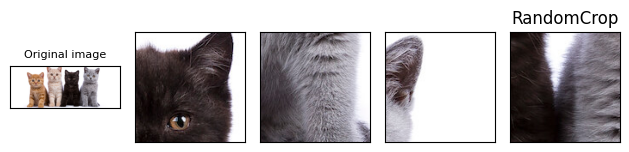

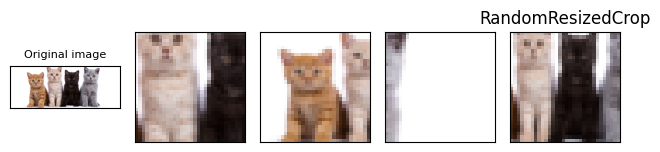

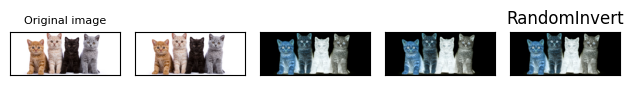

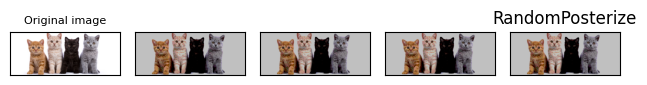

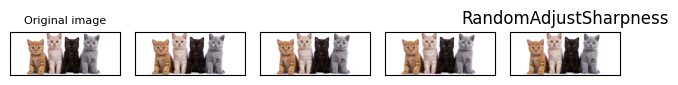

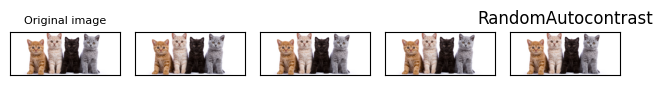

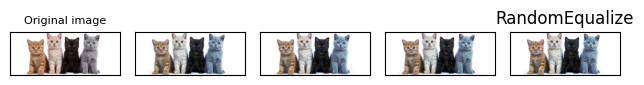

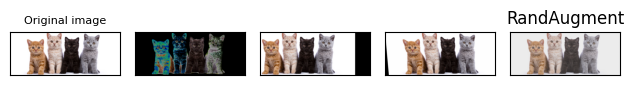

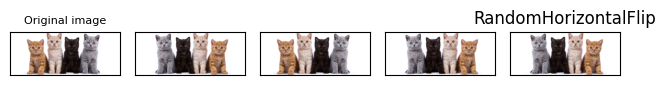

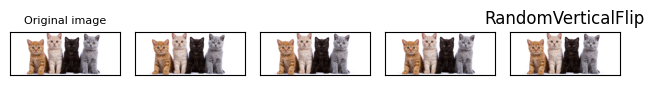

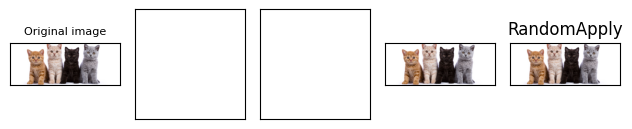

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('cat.jpg')
torch.manual_seed(0)

def plot(imgs, title, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    plt.title(title)

    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

    plt.show()

# 边缘补充
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)] 
plot(padded_imgs, "T.pad")

# 尺寸变换
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs, "T.resize")

# 中心截取
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops,title='CenterCrop')

# 四角及中间截取
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center],title='FiveCrop')


# 灰度变换
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray',title='Grayscale')


# 颜色抖动转换
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs,title='ColorJitter')

# 高斯模糊
blurrer = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs,title='GaussianBlur')

# 随机透视变换
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs,title='RandomPerspective')

# 随机旋转
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs,title='RandomRotation')


# 随机仿射变换
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs,title='RandomAffine')

# 弹性变换
elastic_transformer = T.ElasticTransform(alpha=250.0)
transformed_imgs = [elastic_transformer(orig_img) for _ in range(2)]
plot(transformed_imgs,title='ElasticTransform')

# 随机裁剪
cropper = T.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops,title='RandomCrop')

# 随机缩放裁剪
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops,title='RandomResizedCrop')

# 随机颜色翻转
inverter = T.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs,title='RandomInvert')

# 随机海报化
posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs,title='RandomPosterize')

# 随机调节锐利度
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs,title='RandomAdjustSharpness')

# 随机调节对比度
autocontraster = T.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs,title='RandomAutocontrast')

# 随机直方图均衡
equalizer = T.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs,title='RandomEqualize')


augmenter = T.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs,title='RandAugment')

# 随机垂直翻转
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs,title='RandomHorizontalFlip')

# 随机水平翻转
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs,title='RandomVerticalFlip')

# 随机应用
applier = T.RandomApply(transforms=[T.RandomCrop(size=(64, 64))], p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs,title='RandomApply')

In [17]:
# 图像数据增强后保存

In [30]:
import os
import cv2 as cv
import torch
import numpy as np

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.nn import Sequential

transform = Sequential(
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomHorizontalFlip(p=0.2)
)

class MyDataset(Dataset):
    def __init__(self):
        image_root = r"dataset"
        self.new_root = "my_new_dataset"
        self.file_path_list = []
        dir_name = []
        self.labels = []
        for root, dirs,files in os.walk(image_root):
            if dirs:
                dir_name = dirs
            for i in files:
                file_i_full_path = os.path.join(root, i)
                self.file_path_list.append(file_i_full_path)
                label = root.split(os.sep)[-1]
                label_id = dir_name.index(label)
                self.labels.append(label_id)
    def __len__(self):
        return len(self.file_path_list)
    def __getitem__(self, idx):
        img_path = self.file_path_list[idx]
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, dsize=(256, 256))
        # HWC 0 1 2
        # CHW 2 0 1
        img = np.transpose(img, (2,0,1))
        img_tensor = torch.from_numpy(img)
        img_tensor = transform(img_tensor)

        img_path = img_path.split('\\')
        img_path[0] = self.new_root
        img_path = os.path.join(img_path[0],img_path[1],img_path[2])
        return img_tensor, self.labels[idx], img_path


my_img_dt = MyDataset()
my_dt_loader = DataLoader(my_img_dt, batch_size=1, shuffle=True)

for x_i, y_i,z_i in my_dt_loader:
    x_i = x_i.view(3, 256, 256)
    loc_info = z_i[0].split('\\')
    file_dir = os.path.join(loc_info[0], loc_info[1])

    if os.path.isdir(file_dir):
        pass
    else:
        os.makedirs(file_dir)
    image = transforms.ToPILImage()(x_i)
    image.save(z_i[0])